# Preprocesamiento de los datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import importlib

In [3]:
import basic_preprocessing as bp
import auxiliares_data as aux_d
import crear_dataset as cd

## Parte 1: Limpieza de datos
### Usuarios
Cambios para limpiar los datos de usuarios:
- eliminar la última columna que no esta en 2024
- pasar al mismo formato (sacar comillas donde corresponde)
- eliminar primera fila con los nombres de las features
- cortar hasta agosto 2024

In [4]:
# Definimos los paths para los archivos de usuarios de cada año usando os.path.join
BASE_DIR = os.getcwd()

usuarios_2023_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'usuarios', 'usuarios_ecobici_2023.csv')
usuarios_2022_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'usuarios', 'usuarios_ecobici_2022.csv')
usuarios_2021_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'usuarios', 'usuarios_ecobici_2021.csv')
usuarios_2020_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'usuarios', 'usuarios_ecobici_2020.csv')
usuarios_2024_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'usuarios', 'usuarios_ecobici_2024.csv')

In [5]:
importlib.reload(bp)
df_users, users_cut = bp.unite_usuarios(
    usuarios_2024_path,
    usuarios_2023_path,
    usuarios_2022_path,
    usuarios_2021_path,
    usuarios_2020_path
)

# guardamos df_users en un archivo csv
df_users.to_csv(os.path.join(BASE_DIR, '..', 'data', 'clean', 'usuarios_ecobici.csv'), index=False)

c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\basic_preprocessing.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


### Recorridos

Cambios para limpiar los datos del recorrido:



In [6]:
#Definimos los paths para los archivos de recorridos de cada año usando os.path.join
recorridos_2024_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'recorridos', 'trips_2024.csv')
recorridos_2023_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'recorridos', 'trips_2023.csv')
recorridos_2022_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'recorridos', 'trips_2022.csv')
recorridos_2021_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'recorridos', 'trips_2021.csv')
recorridos_2020_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'recorridos', 'trips_2020.csv')

In [59]:
importlib.reload(bp)
df_recs, eliminados_rec = bp.limpiar_recorridos(
    recorridos_2024_path,
    recorridos_2023_path,
    recorridos_2022_path,
    recorridos_2021_path,
    None #recorridos_2020_path
)

# guardamos df_recs en un archivo csv
df_recs.to_csv(os.path.join(BASE_DIR, '..', 'data', 'clean', 'recorridos_ecobici.csv'), index=False)

c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\basic_preprocessing.py:143: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv(csv_2023, **read_csv_params)


Rango de fechas original:
2024-01-01 00:06:50 a 2024-12-31 23:58:25
Fecha límite aplicada: 2024-08-31 23:59:59
Rango de fechas después de cortar:
2024-01-01 00:06:50 a 2024-08-31 23:54:32
Filas eliminadas: 1403639


In [60]:
#Unificamos los datasets de usuarios y recorridos
importlib.reload(bp)
print(df_users.head())

df_unificado = bp.unificar_datasets(df_recs, df_users)

# guardamos df_unificado en un archivo csv
df_unificado.to_csv(os.path.join(BASE_DIR, '..', 'data', 'clean', 'usuarios_recorridos_ecobici.csv'), index=False)

  id_usuario genero_usuario edad_usuario fecha_alta hora_alta
0     629007         FEMALE         25.0 2020-01-01  18:08:32
1     628464         FEMALE         57.0 2020-01-01  10:11:03
2     628448           MALE         64.0 2020-01-01  09:49:05
3     628373           MALE         22.0 2020-01-01  01:31:03
4     628976           MALE         33.0 2020-01-01  17:47:35


Estadísticas del merge:
Total recorridos: 10560871
Recorridos con información de usuario: 6068228
Recorridos sin información de usuario: 4492643
Porcentaje de match: 57.46%


In [61]:
importlib.reload(aux_d)
aux_d.get_muestras(df_unificado)

,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género,edad_usuario,fecha_alta,hora_alta
0,18999377,565,2023-09-05 14:59:57,262,349 - Plaza Saenz Peña,Andrés Lamas 1699,-58.467297,-34.609709,2023-09-05 15:09:22,342,218 - Campana,1523 Campana,-58.484297,-34.616813,182948,FIT,FEMALE,NaN,NaT,NaN
1,11378975,632,2021-06-26 06:00:57,91,091 - Pasco,708 Pasco & Chile,-58.397602,-34.617448,2021-06-26 06:11:29,24,024 - ALSINA,Adolfo Alsina& Bernardo De Irigoyen,-34.610583,"-34.610583,-58.3808943",640310,ICONIC,FEMALE,23.0,2020-01-15,17:43:41
2,14244217,359,2022-04-21 19:56:04,73,073 - Ruy Díaz de Guzmán,Avenida Martin Garcia y Ruy Díaz de Guzmán,-58.371823,-34.630681,2022-04-21 20:02:03,433,273 - Plazoleta Colombia,1619 Brandsen,-58.373726,-34.637697,404564,ICONIC,OTHER,NaN,NaT,NaN
3,17267286,797,2023-02-17 04:04:51,187,261 - QUINTEROS LIDORO,"1483 Quinteros, Lidoro J. Av.",-58.450897,-34.552571,2023-02-17 04:18:08,187,261 - QUINTEROS LIDORO,"1483 Quinteros, Lidoro J. Av.",-58.450897,-34.552571,918518,ICONIC,MALE,40,2022-11-05,17:08:56
4,17793583,"1,366",2023-04-11 20:20:31,65,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,2023-04-11 20:43:17,25,025 - Plaza Guemes,"Salguero, Jeronimo & Mansilla, Lucio Norberto,...",-58.416118,-34.589427,976759,FIT,FEMALE,19,2023-04-11,19:49:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19019056,"1,216",2023-09-07 19:11:30,44,044 - Ecoparque,"Av. Del Libertador, 3260",-58.413883,-34.575515,2023-09-07 19:31:46,193,193 - ARENALES Y AGUERO,Arenales y Aguero,-58.406165,-34.590863,879115,FIT,MALE,23,2022-08-07,14:53:42
996,14233028,914,2022-04-21 07:18:55,50,050 - Hospital Rivadavia,2516 Pereyra Lucena,-58.401080,-34.583735,2022-04-21 07:34:09,210,335 - General Urquiza,Figueroa Alcorta & Sarmiento,-58.411278,-34.572165,670145,ICONIC,MALE,66.0,2020-06-24,16:08:37
997,13310065,"1,100",2022-01-21 16:21:35,54,054 - Acuña de Figueroa,Lavalle 4015,-58.422069,-34.598210,2022-01-21 16:39:55,199,199 - ESTADOS UNIDOS Y BOEDO,3568 Estados Unidos & Boedo Av.,-58.416014,-34.62226,97988,FIT,MALE,NaN,NaT,NaN
998,12525040,842,2021-11-03 09:43:47,364,381 - Matienzo Y Arce,"1798 Matienzo, Benjamin, Teniente",-58.434470,-34.568693,2021-11-03 09:57:49,206,159 - Fitz Roy & Gorriti,Fitz Roy & Gorriti,-34.58495,"-34.58495,-58.437339",671998,ICONIC,MALE,29.0,2020-07-17,18:03:08


C:\Users\felic\AppData\Local\Temp\ipykernel_3848\860701548.py:3: DtypeWarning: Columns (1,13,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_unificado = pd.read_csv(df_unificado_path)


{2.0: 33391, 3.0: 47655, 4.0: 43729, 5.0: 102730, 6.0: 41035, 7.0: 17150, 8.0: 102291, 9.0: 90876, 12.0: 48765, 13.0: 32637, 14.0: 127526, 17.0: 65406, 20.0: 23897, 21.0: 26031, 22.0: 31567, 23.0: 34502, 24.0: 18015, 25.0: 73525, 26.0: 41089, 27.0: 40458, 28.0: 1, 29.0: 85846, 30.0: 50127, 31.0: 6945, 32.0: 37696, 33.0: 61271, 35.0: 31073, 36.0: 20086, 38.0: 44772, 41.0: 33497, 42.0: 2502, 43.0: 19287, 44.0: 53224, 45.0: 30906, 46.0: 34998, 48.0: 21608, 49.0: 21488, 50.0: 48979, 51.0: 16534, 54.0: 88148, 56.0: 54701, 57.0: 9305, 58.0: 29553, 59.0: 29231, 60.0: 23130, 61.0: 11425, 63.0: 34410, 64.0: 44914, 65.0: 59297, 66.0: 79114, 68.0: 16361, 69.0: 71263, 70.0: 59621, 71.0: 41327, 73.0: 36157, 74.0: 60960, 75.0: 55193, 76.0: 41769, 77.0: 10562, 79.0: 55471, 80.0: 34034, 82.0: 60761, 83.0: 60159, 84.0: 13557, 85.0: 58275, 86.0: 34592, 87.0: 32660, 89.0: 50201, 91.0: 40585, 92.0: 20596, 93.0: 42522, 94.0: 30237, 95.0: 27240, 96.0: 86644, 98.0: 25066, 99.0: 53341, 101.0: 32912, 102.0: 14

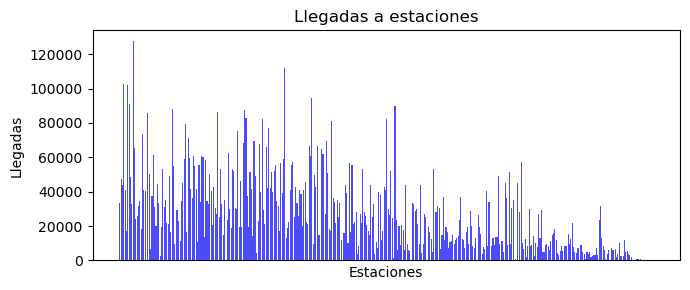

In [8]:
importlib.reload(aux_d)
df_unificado_path = os.path.join(BASE_DIR, '..', 'data', 'clean', 'usuarios_recorridos_ecobici.csv')
df_unificado = pd.read_csv(df_unificado_path)

count = aux_d.count_samples(df_unificado)
print(count)

# histograma de llegada a estaciones
stations = list(count.keys())
print(len(stations))
arrivals = list(count.values())
aux_d.plot_histogram(stations, arrivals, 'Llegadas a estaciones', 'Estaciones', 'Llegadas')


Separamos en train val y test donde test y val son las últimas muestras.
- train - 80% de los datos
- val - 10% de los datos
- test - 10% de los datos

In [9]:
importlib.reload(aux_d)
train_clean, val_clean, test_clean = aux_d.split_dataframe(df_unificado)
print("Train: ", train_clean.head())
print("Validation: ", val_clean.head())
print("Test: ", test_clean.head())

Total muestras: 10560871
Train: 8448696 (80.0%)
Val: 1056087 (10.0%)
Test: 1056088 (10.0%)
Train:     Id_recorrido duracion_recorrido fecha_origen_recorrido  id_estacion_origen  \
0       9646397                249    2021-01-01 00:11:45                 236   
1       9646402                262    2021-01-01 00:16:04                  86   
2       9646396                690    2021-01-01 00:09:43                 277   
3       9646398                659    2021-01-01 00:12:44                 186   
4       9646409                 77    2021-01-01 00:22:42                 261   

         nombre_estacion_origen         direccion_estacion_origen  \
0  254 - Plaza Rafael Hernandez           Vuelta de Obligado 2004   
1                086 - SAAVEDRA                     1019 Saavedra   
2           292 - PLAZA BOLIVIA  Olleros Av. & Del Libertador Av.   
3              186 - MANZANA 66                       2875 Moreno   
4    272 - Plaza Bruno Giordano            Bruno Giordano&Neuquen   


# Crear dataset
generamos un dataset donde cada muestra es la cantidad de bicis llegadas a una estación específica en una hora específica.

Creamos dataset para todas las estaciones con lsa features inciales simples.

In [10]:
lista_estaciones = list(count.keys())
print(lista_estaciones)
# me quedo con todo despues de 147
lista_estaciones_acotada = lista_estaciones[147:]

importlib.reload(cd)
datasets_train = cd.generar_dataset_multiple_estaciones(train_clean, lista_estaciones_acotada)

[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 12.0, 13.0, 14.0, 17.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 35.0, 36.0, 38.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 48.0, 49.0, 50.0, 51.0, 54.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 63.0, 64.0, 65.0, 66.0, 68.0, 69.0, 70.0, 71.0, 73.0, 74.0, 75.0, 76.0, 77.0, 79.0, 80.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 89.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 98.0, 99.0, 101.0, 102.0, 104.0, 105.0, 107.0, 111.0, 112.0, 114.0, 116.0, 117.0, 118.0, 120.0, 121.0, 122.0, 124.0, 126.0, 128.0, 130.0, 131.0, 132.0, 134.0, 135.0, 137.0, 138.0, 144.0, 146.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 155.0, 156.0, 158.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 171.0, 172.0, 174.0, 175.0, 176.0, 177.0, 179.0, 181.0, 182.0, 183.0, 184.0, 186.0, 187.0, 188.0, 189.0, 190.0, 191.0, 193.0, 194.0, 196.0, 197.0, 199.0, 200.0, 202.0, 203.0, 204.0, 205.0, 206.0, 207.0, 208.0, 210.0, 212.0, 213.0, 214.0, 215.0

c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 207.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 208.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 210.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 212.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 213.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 214.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 215.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 216.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 219.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 220.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 222.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 223.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 227.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 228.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 229.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 230.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 231.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 232.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 233.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 234.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 235.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 236.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 237.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 239.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 241.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 242.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 245.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 247.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 248.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 249.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 251.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 252.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 253.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 254.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 255.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 257.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 258.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 259.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 260.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 261.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 262.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 263.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 264.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 265.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 267.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 268.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 269.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 270.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 271.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 273.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 275.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 277.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 278.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 280.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 281.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 284.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 288.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 289.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 291.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 294.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 299.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 301.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 302.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 304.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 307.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 308.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 309.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 310.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 311.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 313.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 316.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 318.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 322.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 323.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 324.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 327.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 329.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 330.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 333.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 335.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 336.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 337.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 340.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 342.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 348.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 349.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 353.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 355.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 358.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 359.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 361.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 362.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 363.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 364.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 366.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 367.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 368.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 369.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 370.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 371.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 372.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 373.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 374.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 375.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 376.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 378.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 379.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 381.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 382.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 383.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 384.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 385.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 386.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 387.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 392.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 393.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 395.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 400.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 402.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 403.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 407.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 408.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 412.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 413.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 414.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 416.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 417.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 418.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 419.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 420.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 422.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 423.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 424.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 425.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 426.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 427.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 428.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 429.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 431.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 432.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 433.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 434.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 435.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 436.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 440.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 441.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 442.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 443.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 444.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 447.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 448.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 449.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 453.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 454.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 455.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 456.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 457.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 458.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 459.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 460.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 461.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 462.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 464.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 465.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 466.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 467.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 468.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 469.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 471.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 472.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 473.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 474.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 475.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 476.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 477.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 478.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 479.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 480.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 481.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 482.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 483.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 484.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 485.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 486.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 487.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 488.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 489.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 490.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 491.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 492.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 493.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 494.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 496.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 497.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 498.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 499.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 500.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 501.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 502.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 503.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 504.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 505.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 506.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 507.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 508.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 509.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 511.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 512.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 513.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 515.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 516.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 517.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 518.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 519.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 520.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 521.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 522.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 523.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 524.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 525.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 526.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 527.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 528.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 529.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 530.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 531.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 532.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 533.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 534.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 535.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 536.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 537.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 538.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 539.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 540.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 541.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 542.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 543.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 544.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 545.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 546.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 547.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 548.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 549.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 550.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 551.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 552.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 553.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 554.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 556.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

In [11]:
importlib.reload(cd)
datasets_val = cd.generar_dataset_multiple_estaciones(val_clean, lista_estaciones)
datasets_test = cd.generar_dataset_multiple_estaciones(test_clean, lista_estaciones)

Procesando estación 2.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 3.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 4.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 5.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 6.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 7.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 8.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 9.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 12.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 13.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 14.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 17.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 20.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 21.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 22.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 23.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 24.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 25.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 26.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 27.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 28.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 29.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 30.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 31.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 32.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 33.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 35.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 36.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 38.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 41.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 42.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 43.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 44.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 45.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 46.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 48.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 49.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 50.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 51.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 54.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 56.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 57.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 58.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 59.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 60.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 61.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 63.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 64.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 65.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 66.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 68.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 69.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 70.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 71.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 73.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 74.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 75.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 76.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 77.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 79.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 80.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 82.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 83.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 84.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 85.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 86.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 87.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 89.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 91.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 92.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 93.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 94.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 95.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 96.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 98.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 99.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 101.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 102.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 104.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 105.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 107.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 111.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 112.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 114.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 116.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 117.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 118.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 120.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 121.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 122.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 124.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 126.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 128.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 130.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 131.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 132.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 134.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 135.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 137.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 138.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 144.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 146.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 148.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 149.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 150.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 151.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 152.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 153.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 155.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 156.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 158.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 161.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 162.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 163.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 164.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 165.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 166.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 167.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 168.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 169.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 171.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 172.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 174.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 175.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 176.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 177.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 179.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 181.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 182.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 183.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 184.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 186.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 187.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 188.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 189.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 190.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 191.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 193.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 194.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 196.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 197.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 199.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 200.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 202.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 203.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 204.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 205.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 206.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 207.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 208.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 210.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 212.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 213.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 214.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 215.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 216.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 219.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 220.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 222.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 223.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 227.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 228.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 229.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 230.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 231.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 232.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 233.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 234.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 235.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 236.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 237.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 239.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 241.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 242.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 245.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 247.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 248.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 249.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 251.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 252.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 253.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 254.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 255.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 257.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 258.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 259.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 260.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 261.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 262.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 263.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 264.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 265.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 267.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 268.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 269.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 270.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 271.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 273.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 275.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 277.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 278.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 280.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 281.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 284.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 288.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 289.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 291.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 294.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 299.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 301.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 302.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 304.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 307.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 308.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 309.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 310.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 311.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 313.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 316.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 318.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 322.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 323.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 324.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 327.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 329.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 330.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 333.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 335.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 336.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 337.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 340.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 342.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 348.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 349.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 353.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 355.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 358.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 359.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 361.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 362.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 363.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 364.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 366.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 367.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 368.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 369.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 370.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 371.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 372.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 373.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 374.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 375.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 376.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 378.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 379.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 381.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 382.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 383.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 384.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 385.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 386.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 387.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 392.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 393.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 395.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 400.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 402.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 403.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 407.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 408.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 412.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 413.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 414.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 416.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 417.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 418.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 419.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 420.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 422.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 423.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 424.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 425.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 426.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 427.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 428.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 429.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 431.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 432.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 433.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 434.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 435.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 436.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 440.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 441.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 442.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 443.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 444.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 447.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 448.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 449.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 453.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 454.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 455.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 456.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 457.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 458.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 459.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 460.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 461.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 462.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 464.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 465.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 466.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 467.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 468.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 469.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 471.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 472.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 473.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 474.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 475.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 476.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 477.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 478.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 479.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 480.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 481.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 482.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 483.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 484.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 485.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 486.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 487.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 488.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 489.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 490.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 491.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 492.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 493.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 494.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 496.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 497.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 498.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 499.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 500.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 501.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 502.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 503.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 504.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 505.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 506.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 507.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 508.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 509.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 511.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 512.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 513.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 515.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 516.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 517.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 518.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 519.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 520.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 521.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 522.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 523.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 524.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 525.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 526.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 527.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 528.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 529.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 530.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 531.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 532.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 533.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 534.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 535.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 536.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 537.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 538.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 539.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 540.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 541.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 542.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 543.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 544.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 545.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 546.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 547.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 548.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 549.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 550.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 551.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 552.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 553.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 554.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 556.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 2.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 3.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 4.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 5.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 6.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 7.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 8.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 9.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 12.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 13.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 14.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 17.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 20.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 21.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 22.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 23.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 24.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 25.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 26.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 27.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 28.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 29.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 30.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 31.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 32.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 33.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 35.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 36.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 38.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 41.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 42.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 43.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 44.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 45.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 46.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 48.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 49.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 50.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 51.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 54.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 56.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 57.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 58.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 59.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 60.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 61.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 63.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 64.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 65.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 66.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 68.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 69.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 70.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 71.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 73.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 74.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 75.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 76.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 77.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 79.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 80.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 82.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 83.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 84.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 85.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 86.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 87.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 89.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 91.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 92.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 93.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 94.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 95.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 96.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 98.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 99.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 101.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 102.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 104.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 105.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 107.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 111.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 112.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 114.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 116.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 117.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 118.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 120.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 121.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 122.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 124.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 126.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 128.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 130.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 131.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 132.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 134.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 135.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 137.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 138.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 144.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 146.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 148.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 149.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 150.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 151.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 152.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 153.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 155.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 156.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 158.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 161.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 162.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 163.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 164.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 165.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 166.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 167.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 168.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 169.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 171.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 172.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 174.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 175.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 176.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 177.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 179.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 181.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 182.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 183.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 184.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 186.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 187.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 188.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 189.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 190.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 191.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 193.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 194.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 196.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 197.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 199.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 200.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 202.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 203.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 204.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 205.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 206.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 207.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 208.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 210.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 212.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 213.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 214.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 215.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 216.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 219.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 220.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 222.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 223.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 227.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 228.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 229.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 230.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 231.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 232.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 233.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 234.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 235.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 236.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 237.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 239.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 241.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 242.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 245.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 247.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 248.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 249.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 251.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 252.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 253.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 254.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 255.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 257.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 258.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 259.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 260.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 261.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 262.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 263.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 264.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 265.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 267.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 268.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 269.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 270.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 271.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 273.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 275.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 277.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 278.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 280.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 281.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 284.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 288.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 289.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 291.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 294.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 299.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 301.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 302.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 304.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 307.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 308.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 309.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 310.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 311.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 313.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 316.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 318.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 322.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 323.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 324.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 327.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 329.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 330.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 333.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 335.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 336.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 337.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 340.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 342.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 348.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 349.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 353.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 355.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 358.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 359.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 361.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 362.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 363.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 364.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 366.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 367.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 368.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 369.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 370.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 371.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 372.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 373.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 374.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 375.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 376.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 378.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 379.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 381.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 382.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 383.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 384.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 385.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 386.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 387.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 392.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 393.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 395.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 400.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 402.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 403.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 407.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 408.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 412.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 413.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 414.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 416.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 417.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 418.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 419.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 420.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 422.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 423.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 424.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 425.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 426.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 427.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 428.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 429.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 431.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 432.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 433.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 434.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 435.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 436.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 440.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 441.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 442.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 443.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 444.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 447.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 448.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 449.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 453.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 454.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 455.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 456.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 457.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 458.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 459.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 460.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 461.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 462.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 464.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 465.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 466.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 467.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 468.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 469.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 471.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 472.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 473.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 474.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 475.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 476.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 477.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 478.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 479.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 480.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 481.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 482.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 483.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 484.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 485.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 486.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 487.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 488.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 489.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 490.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 491.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 492.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 493.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 494.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 496.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 497.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 498.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 499.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 500.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 501.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 502.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 503.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 504.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 505.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 506.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 507.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 508.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 509.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 511.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 512.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 513.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 515.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 516.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 517.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 518.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 519.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 520.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 521.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 522.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 523.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 524.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 525.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 526.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 527.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 528.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 529.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 530.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 531.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 532.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 533.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 534.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 535.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 536.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 537.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 538.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 539.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 540.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 541.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 542.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 543.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 544.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 545.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 546.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 547.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 548.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 549.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 550.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 551.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 552.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 553.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 554.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 556.0...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

In [12]:
# guardamos los datasets
for i, dataset in enumerate(datasets_train):
    dataset.to_csv(os.path.join(BASE_DIR, '..', 'data', 'processed', 'features1', 'train', f'dataset_train_{i+147}.csv'), index=False)

for i, dataset in enumerate(datasets_val):
    dataset.to_csv(os.path.join(BASE_DIR, '..', 'data', 'processed', 'features1', 'validation', f'dataset_val_{i+1}.csv'), index=False)

for i, dataset in enumerate(datasets_test):
    dataset.to_csv(os.path.join(BASE_DIR, '..', 'data', 'processed', 'features1', 'test', f'dataset_test_{i+1}.csv'), index=False)